# Experiment Results Evaluation

This notebook loads the metrics saved from different experiment runs and generates comparative plots.

In [ ]:
import pandas

import pandas as pd
import matplotlib.pyplot as plt

paths = {
    'weinig_lr': '../results_experiments/lr0.0001_bs64_uf1000_g0.99/episode_metrics.csv',
    'meer_lr': '../results_experiments/lr0.00025_bs32_uf1000_g0.99/episode_metrics.csv',
}
paths_training = {
    'weinig_lr_training': '../results_experiments/lr0.0001_bs64_uf1000_g0.99_training/episode_metrics.csv',

    'meer_lr_training': '../results_experiments/lr0.00025_bs32_uf1000_g0.99_training/episode_metrics.csv'
}
dataframes_results = {label: pd.read_csv(path) for label, path in paths.items()}
dataframes_training = {label: pd.read_csv(path) for label, path in paths_training.items()}


In [26]:
agents = {
    'DQN': 'Agent1_DQN_score',
    'Baseline2': 'Agent2_Baseline_score',
    'Baseline3': 'Agent3_Baseline_score',
    'Baseline4': 'Agent4_Baseline_score'
}

resultaten = {}

for config_label, df in dataframes_results.items():
    config_result = {}
    for agent_label, column in agents.items():
        gewonnen = (df[column] == 1).sum()
        verloren = (df[column] == -1).sum()
        gelijk = (df[column] == 0).sum()

        config_result[agent_label] = {
            'Gewonnen': gewonnen,
            'Verloren': verloren,
            'Gelijkspel': gelijk
        }

    resultaten[config_label] = config_result

records = []
for config, agents_dict in resultaten.items():
    for agent, stats in agents_dict.items():
        records.append({
            'Configuratie': config,
            'Agent': agent,
            **stats
        })

result_df = pd.DataFrame(records)
print(result_df)


  Configuratie      Agent  Gewonnen  Verloren  Gelijkspel
0    weinig_lr        DQN         2         8           0
1    weinig_lr  Baseline2         0        10           0
2    weinig_lr  Baseline3         4         6           0
3    weinig_lr  Baseline4         4         6           0
4      meer_lr        DQN         4         6           0
5      meer_lr  Baseline2         1         9           0
6      meer_lr  Baseline3         2         8           0
7      meer_lr  Baseline4         3         7           0


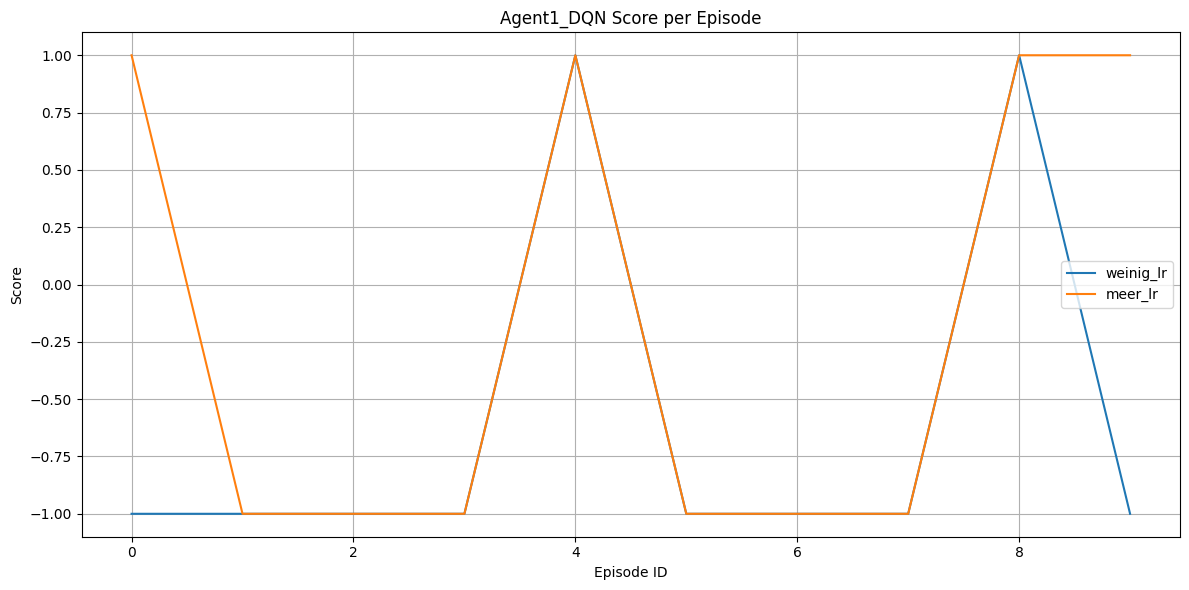

In [15]:
# Plotten
plt.figure(figsize=(12, 6))

for label, df in dataframes_results.items():
    if 'episode_id' in df.columns and 'Agent1_DQN_score' in df.columns:
        plt.plot(df['episode_id'], df['Agent1_DQN_score'], label=label)
    else:
        print(f"⚠️ Kolommen ontbreken in {label}")

plt.title("Agent1_DQN Score per Episode")
plt.xlabel("Episode ID")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Zoals je ziet in de grafiek zijn ze bijna compleet het zelfde. Dit komt omdat we niet genoeg hebben getrained. Dus hebben de agents niet genoeg geleerd. Nu winnen ze en verliezen ze ook met geluk.

In [ ]:
agents = {
    'DQN': 'Agent1_DQN_score',
    'Baseline2': 'Agent2_Baseline_score',
    'Baseline3': 'Agent3_Baseline_score',
    'Baseline4': 'Agent4_Baseline_score'
}

resultaten = {}

for config_label, df in dataframes_training.items():
    config_result = {}
    for agent_label, column in agents.items():
        gewonnen = (df[column] == 1).sum()
        verloren = (df[column] == -1).sum()
        gelijk = (df[column] == 0).sum()

        config_result[agent_label] = {
            'Gewonnen': gewonnen,
            'Verloren': verloren,
            'Gelijkspel': gelijk
        }

    resultaten[config_label] = config_result

records = []
for config, agents_dict in resultaten.items():
    for agent, stats in agents_dict.items():
        records.append({
            'Configuratie': config,
            'Agent': agent,
            **stats
        })

result_df = pd.DataFrame(records)
print(result_df)


         Configuratie      Agent  Gewonnen  Verloren  Gelijkspel
0  weinig_lr_training        DQN        12        38           0
1  weinig_lr_training  Baseline2         9        41           0
2  weinig_lr_training  Baseline3         6        44           0
3  weinig_lr_training  Baseline4        23        27           0
4    meer_lr_training        DQN        13        37           0
5    meer_lr_training  Baseline2        11        39           0
6    meer_lr_training  Baseline3        12        38           0
7    meer_lr_training  Baseline4        14        36           0


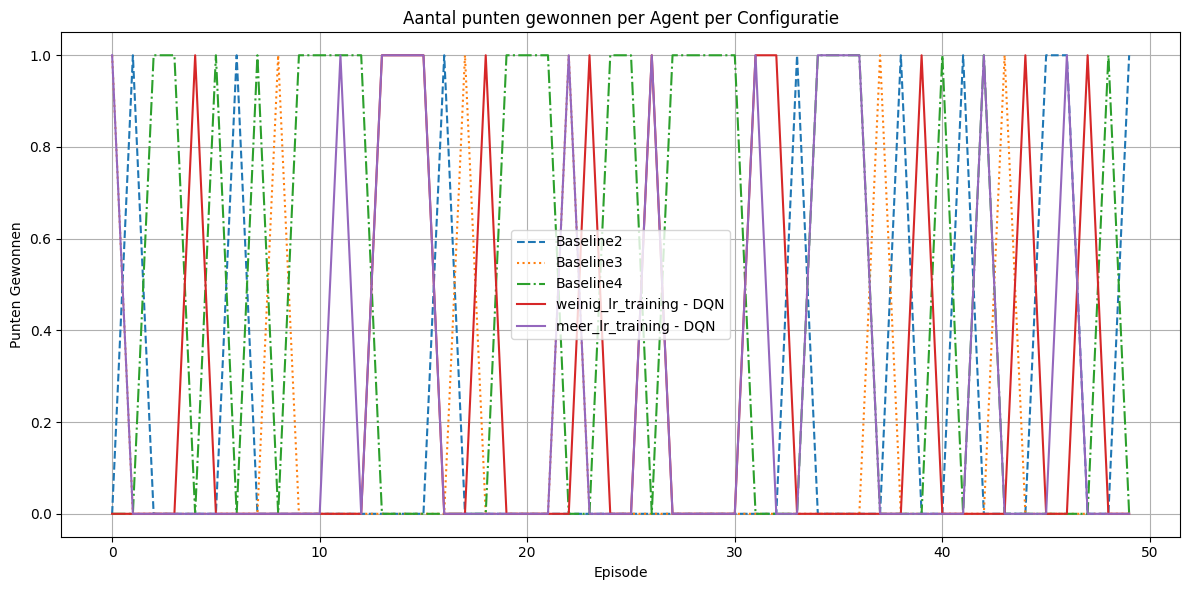

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

baseline_df = list(dataframes_training.values())[0] 

plt.plot(baseline_df['episode_id'], baseline_df['Agent2_Baseline_points_won'], linestyle='--', label='Baseline2')
plt.plot(baseline_df['episode_id'], baseline_df['Agent3_Baseline_points_won'], linestyle=':', label='Baseline3')
plt.plot(baseline_df['episode_id'], baseline_df['Agent4_Baseline_points_won'], linestyle='-.', label='Baseline4')

for label, df in dataframes_training.items():
    plt.plot(df['episode_id'], df['Agent1_DQN_points_won'], label=f'{label} - DQN')

plt.title("Aantal punten gewonnen per Agent per Configuratie")
plt.xlabel("Episode")
plt.ylabel("Punten Gewonnen")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


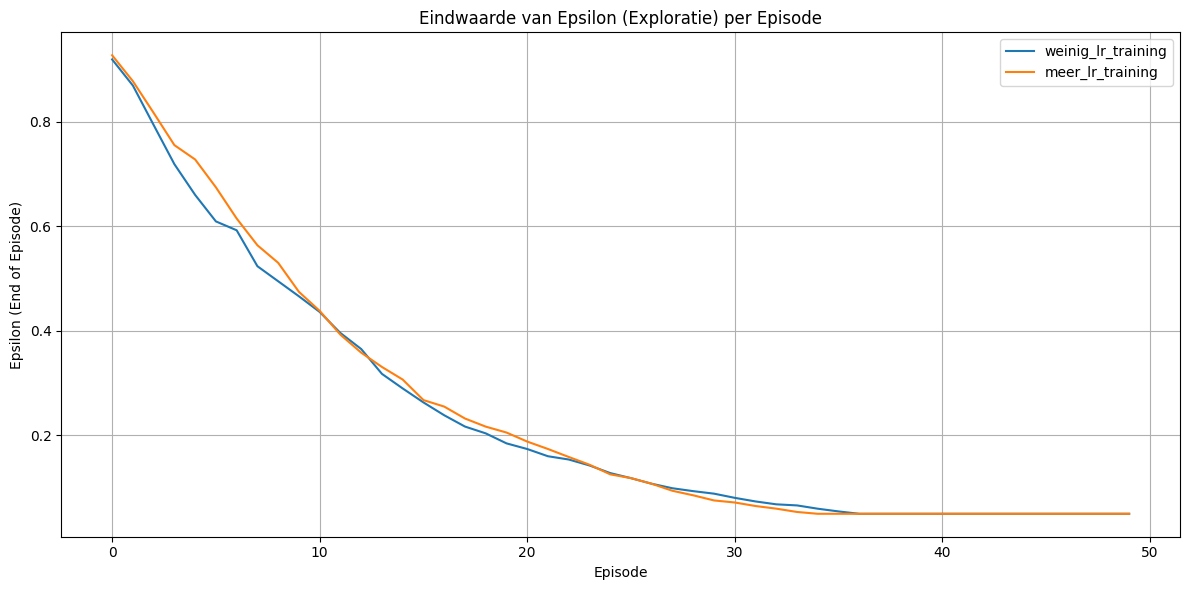

In [19]:
plt.figure(figsize=(12, 6))

for label, df in dataframes_training.items():
    plt.plot(df['episode_id'], df['Agent1_DQN_epsilon_end_episode'], label=f'{label}')

plt.title("Eindwaarde van Epsilon (Exploratie) per Episode")
plt.xlabel("Episode")
plt.ylabel("Epsilon (End of Episode)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


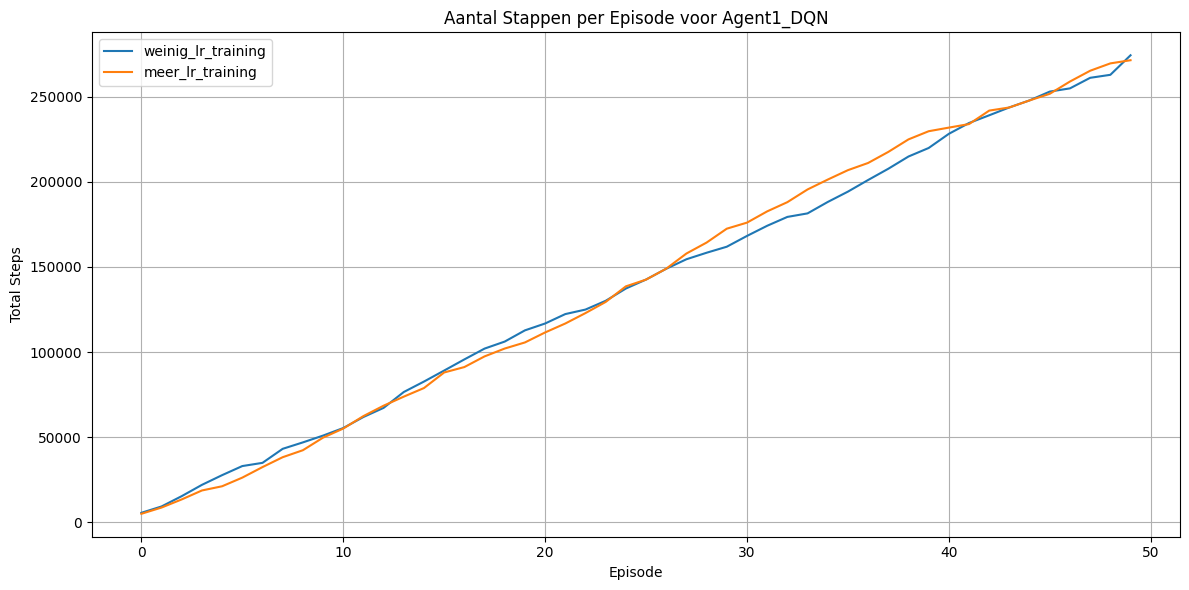

In [20]:
plt.figure(figsize=(12, 6))

for label, df in dataframes_training.items():
    plt.plot(df['episode_id'], df['Agent1_DQN_total_steps_end_episode'], label=f'{label}')

plt.title("Aantal Stappen per Episode voor Agent1_DQN")
plt.xlabel("Episode")
plt.ylabel("Total Steps")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
